In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
#data sets
en = "../../../data/team_player/cleaned_final/epl.csv"
spain = "../../../data/team_player/cleaned_final/liga.csv"
it = "../../../data/team_player/cleaned_final/serieA.csv"

eng_df = pd.read_csv(en)
spain_df = pd.read_csv(spain)
it_df = pd.read_csv(it)

final_df = pd.concat([eng_df,spain_df,it_df])
final_df.describe()

,Unnamed: 0,Ranking,Year,Points,Goals+,Goals-,avg age,avg heights (cm),avg weight (kg),avg player rating,avg player value (EU),avg player wage,Shots pg,Yellowcard,RedCard,Possession%,Pass%,AerialsWon
count,421.000000,421.000000,421.000000,420.00000,420.000000,420.000000,361.000000,361.000000,361.000000,361.000000,3.610000e+02,361.000000,420.000000,420.000000,420.000000,420.000000,420.000000,420.000000
mean,69.667458,10.503563,2016.992874,47.22381,33.835714,29.938095,25.161662,182.041330,75.823352,72.523075,6.606378e+06,32572.077562,12.526905,89.728571,3.492857,50.005476,78.882143,16.594286
std,40.559288,5.766745,2.005337,20.84635,17.087565,15.925872,1.091045,1.467972,1.661727,3.165041,6.259211e+06,32694.307715,2.349908,122.564863,2.358643,5.007550,5.133147,3.761869
min,0.000000,1.000000,2014.000000,1.00000,6.000000,4.000000,22.560000,178.120000,71.300000,64.310000,0.000000e+00,0.000000,5.500000,10.000000,0.000000,37.200000,61.900000,9.100000
25%,35.000000,6.000000,2015.000000,35.00000,22.000000,19.000000,24.360000,181.070000,74.580000,70.350000,2.664687e+06,10036.000000,10.900000,59.000000,2.000000,46.200000,75.400000,14.000000
50%,70.000000,11.000000,2017.000000,45.00000,30.000000,25.000000,25.100000,182.060000,75.770000,72.190000,5.041060e+06,23464.000000,12.000000,77.000000,3.000000,49.300000,79.000000,16.100000
75%,105.000000,15.000000,2019.000000,60.25000,43.000000,38.000000,25.830000,183.060000,77.000000,74.500000,8.232575e+06,44121.000000,13.825000,95.000000,5.000000,53.725000,82.500000,18.800000
max,140.000000,20.000000,2020.000000,100.00000,118.000000,85.000000,28.330000,186.240000,80.300000,82.380000,3.179808e+07,188833.000000,19.600000,1257.000000,11.000000,66.400000,89.300000,30.300000


In [60]:
final_df = final_df.dropna().drop(columns=["Unnamed: 0"])

<AxesSubplot:>

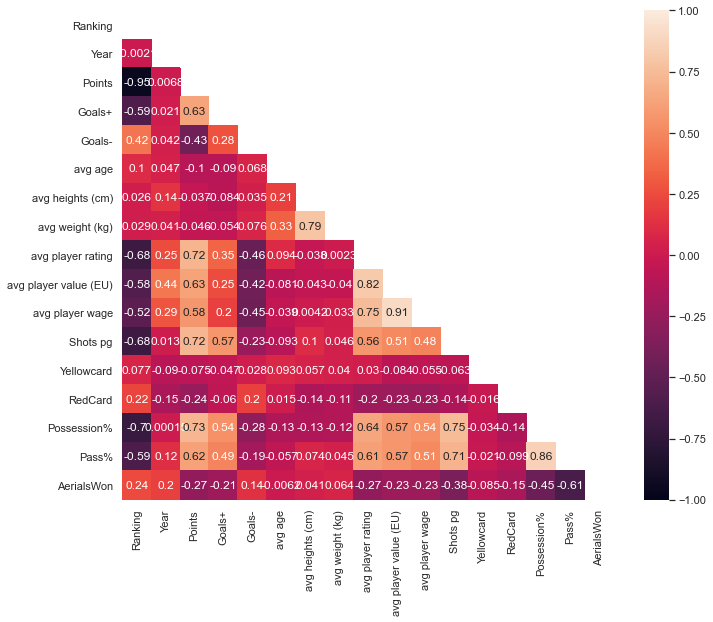

In [106]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme(style="white")
# Compute the correlation matrix
corr = final_df.corr()
# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(50, 50, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
#sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
#            square=True, linewidths=.5, cbar_kws={"shrink": .5})
sns.heatmap(corr,vmin=-1, vmax=1, annot=True,mask=mask)
#final_df.corr()["Ranking"]

In [91]:
#divide the data into attributes (independent variable X), labels(dependent variable, the prediction, y)
X = final_df[["Goals+","Goals-","avg player rating",
    "avg player value (EU)","Shots pg",'Possession%',"AerialsWon"]]
y = final_df["Ranking"]
#yy = final_df["Points"]

In [84]:
#Execute the following code to divide our data into training and test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [85]:
#from sklearn.model_selection import train_test_split
#X_train, X_test, yy_train, yy_test = train_test_split(X, yy, test_size=0.2, random_state=0)

In [86]:
'''
Linear regression
'''
#train the algorithm
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)


LinearRegression()

In [87]:
#the regression model has to find the most optimal coefficients for all the attributes. 
#To see what #coefficients our regression model has chosen, execute the following script:
coeff_df = pd.DataFrame(regressor.coef_, X.columns, columns=['Coefficient'])
coeff_df

,Coefficient
Goals+,-1.998505e-01
Goals-,1.708031e-01
avg player rating,-2.199969e-01
avg player value (EU),-7.928190e-09
Shots pg,-1.151250e-01
Possession%,-2.343688e-01
AerialsWon,-1.053147e-01


[This means :] 
* for an increase of 1 unit in goals+, there is a decrease of 0.228 in ranking means closer from the top.
* for an increase of 1 unit in goals-, there is a increase of 0.22 in ranking means further from the top.
* for an increase of 1 unit in player_rate, there is a decrease of 0.32 in ranking means closer from the top.

In [88]:
#predictions
y_pred = regressor.predict(X_test)
#compare the predictions
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df.head()

,Actual,Predicted
6,7,7.412668
104,4,4.822739
106,7,9.312863
97,17,13.841130
90,11,12.175365


In [89]:
#Evaluation of the algorithm
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 2.5193506389116904
Mean Squared Error: 11.374120272259939
Root Mean Squared Error: 3.37255396876906


In [38]:
'''
Logistic regression
'''
# import the class
from sklearn.linear_model import LogisticRegression
# instantiate the model (using the default parameters)
logreg = LogisticRegression()
# fit the model with data
logreg.fit(X_train, y_train)
# predict the response values for the observations in X
y_pred2 = logreg.predict(X_test)
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred2})
df.head(5)

,Actual,Predicted
6,7,4
104,4,6
106,7,7
97,17,20
90,11,14


In [39]:
# compute classification accuracy for the logistic regression model
from sklearn import metrics

print(metrics.accuracy_score(y_test, y_pred2))

0.20833333333333334


In [40]:
'''
KNN
'''
from sklearn.neighbors import KNeighborsClassifier
ks = {}
for k in range(1,50):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred3 = knn.predict(X_test)
    ks[k] = metrics.accuracy_score(y_test, y_pred3)


Min k neighbours = 12


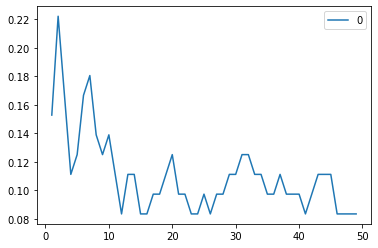

In [53]:
ks_df = pd.DataFrame.from_dict(ks, orient='index')
ks_df.plot()
print(f"Min k neighbours = {ks_df[0].idxmin()}")

In [55]:
'''
Rainforest
'''
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.ensemble import RandomForestRegressor

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)


regressor = RandomForestRegressor(n_estimators=12, random_state=0)
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)


print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 2.170138888888889
Mean Squared Error: 7.708622685185186
Root Mean Squared Error: 2.7764406503984893
